# Problem Statement
Using Linear regression model to predict total sales using features like money spent on Advertising / Marketing individual fields.

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the data
data=pd.read_csv("Advertising (1).csv")

In [5]:
data

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [6]:
# We have the data of a company that has three independent variables and a target variable
# TV, Radio, Newspaper are the input variables where the money is spent on advertising
# Sales is the target variable where the data related to money generated w.r.t advertising

In [7]:
# Let us drop the unwanted column i.e. unnamed: 0
data.drop('Unnamed: 0',axis = 1,inplace = True) # axis =1 represents for columns, inplace=True is used to make permanent changes

In [8]:
data

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [9]:
# This data basically tells us about the total sales made by the company by investing certain amount on TV, Radio and Newspaper

In [10]:
# Basic checks

In [12]:
data.shape # No. of (rows,columns)

(200, 4)

In [14]:
data.columns # column names

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
# Gives non-null value count
# Shows dataset's memory usage in this case it's 6.4KB

In [18]:
data.describe().T # T is used for transpose 

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [19]:
# Insights
# Average money spent on TV is more than Radio and Newspaper 
# Max money spent on TV is more than Radio and Newspaper combined
# Average sales made by the company is 14M

In [22]:
# Check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
# There are no null values in any columns

## Exploratory Data Analysis

### Univariate analysis
* Analyzing single variable/column/feature
* check the distribution of each column

<AxesSubplot:ylabel='Density'>

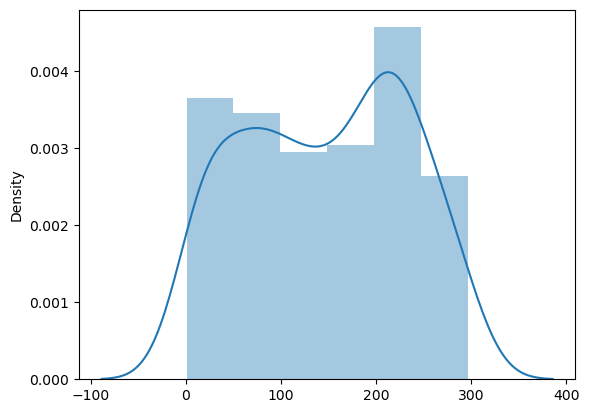

In [40]:
# Check distribution of TV using seaborn
sns.distplot(x=data.TV) # Using distplot to check the distribution of the features

<AxesSubplot:ylabel='Density'>

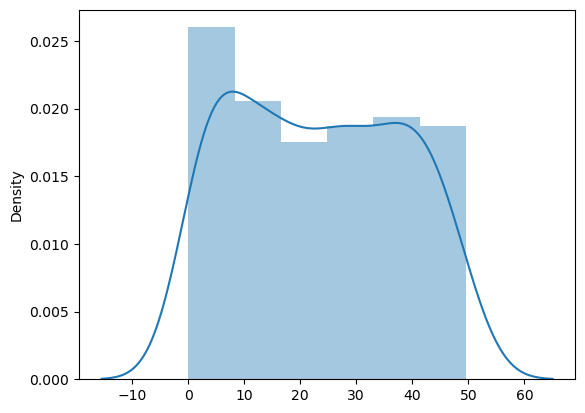

In [25]:
# check distribution of Radio
sns.distplot(x=data.Radio)

<AxesSubplot:ylabel='Density'>

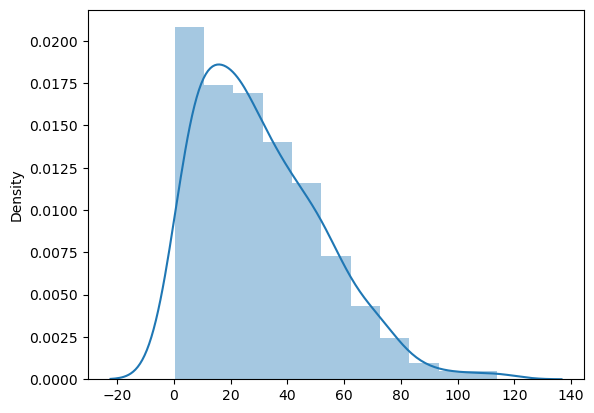

In [27]:
# check distribution of Newspaper
sns.distplot(x=data.Newspaper)

<AxesSubplot:ylabel='Density'>

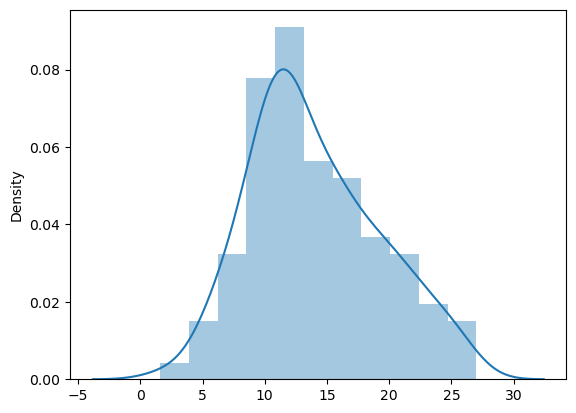

In [28]:
# check distribution of sales
sns.distplot(x=data.Sales)

In [29]:
# Insights
# Sales is representing normal distribution
# Newspaper, Radio, TV are representing skewness/not normal

## Bivariate analysis
-Analyzing two variables

<AxesSubplot:xlabel='TV', ylabel='Sales'>

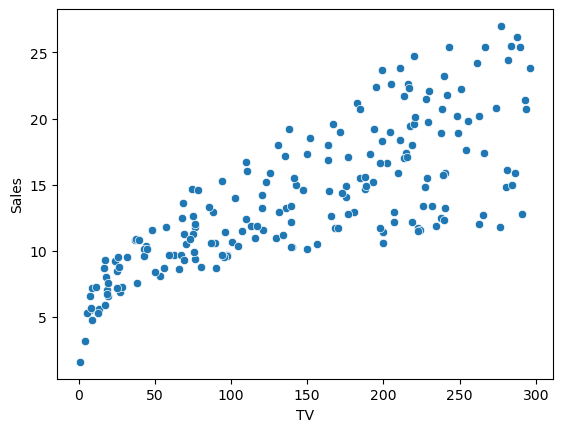

In [99]:
# Analyze how amount spent on TV impact sales
sns.scatterplot(data=data,x='TV',y='Sales') # Using scatter plot to do bivariate analysis

In [31]:
# Insights
# As we increase the amount of money spent on TV advertising then sales will increase.
# There is a high correlation between TV and sales
# More we invest in TV higher will be the sales
# There is a positive relationship between Tv and Sales.

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

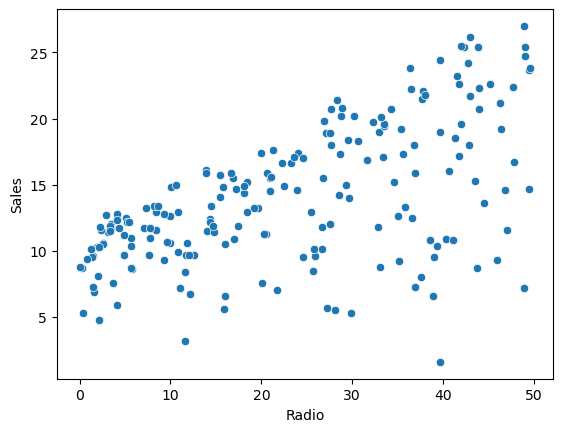

In [89]:
# Analyze how amount spent on Radio impact sales
sns.scatterplot(data=data,x='Radio',y='Sales')

In [33]:
# Insights
# There is no much trend or strong relationship between Radio and sales.
# Investing in Radio advertising will have less impact on sales.
# We can see that high investment in radio advertising sometimes sales was high and sometime sales was low.

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

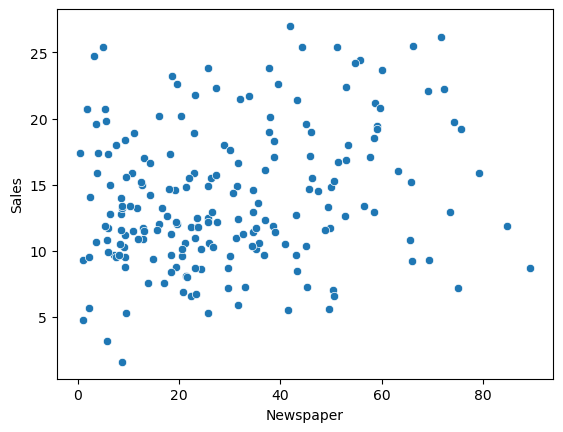

In [90]:
# Analzse how amount spent on Newspaper impact sales
sns.scatterplot(data=data,x='Newspaper',y='Sales')

In [35]:
# insights
# There is no relationship between Newspaper and Sales
# Investing more or less on Newspaper advertising will yield very less sales.

## Multivariate analysis

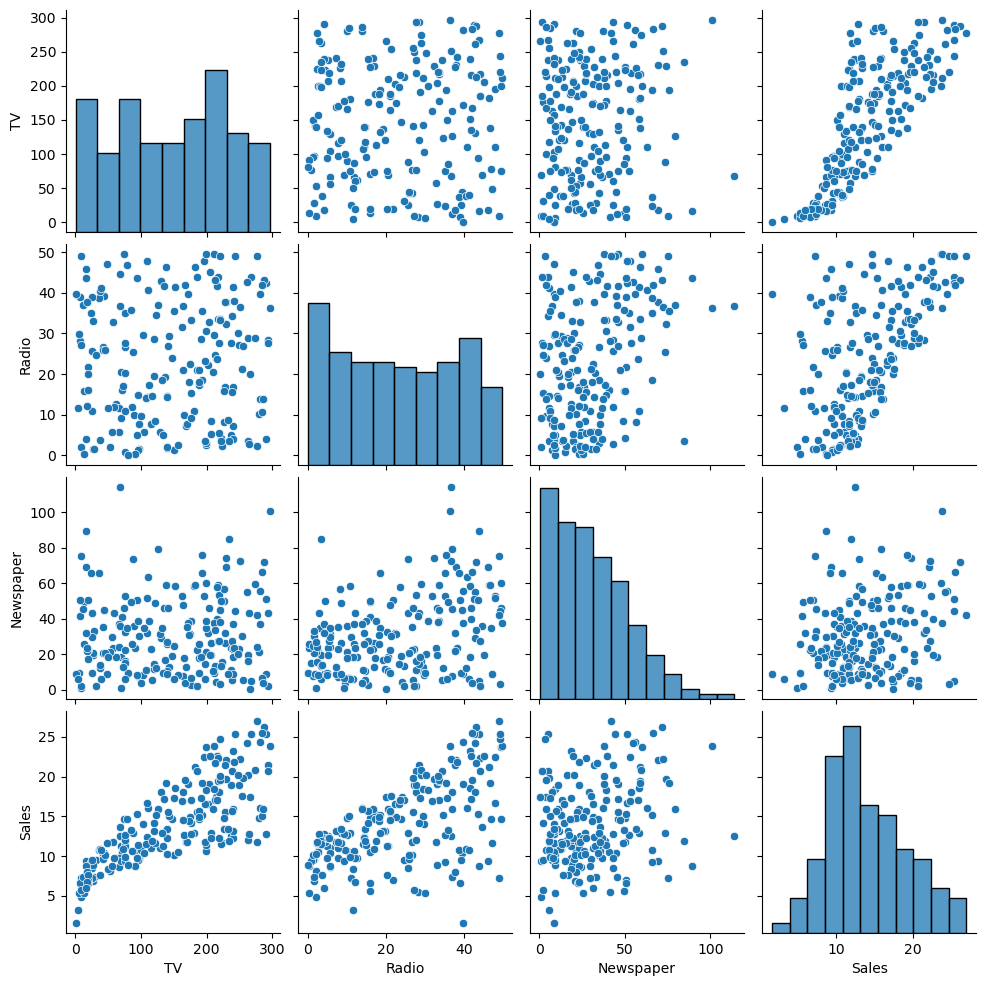

In [38]:
sns.pairplot(data) # Using pairplot to do multivariate analysis

In [36]:
# Overall Insights
# Television is the best field for advertising the product so that the company can yield more sales.
# Investing in Radio will also yield some good sales but investing newspaper is not really a good idea.

## Data preprocessing

In [41]:
# Check for null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [42]:
# Check for duplicated values
data.duplicated().sum()

0

In [ ]:
# Handling outliers are very important in order to make proper prediction. If neglected the prediction results poor

<AxesSubplot:xlabel='TV'>

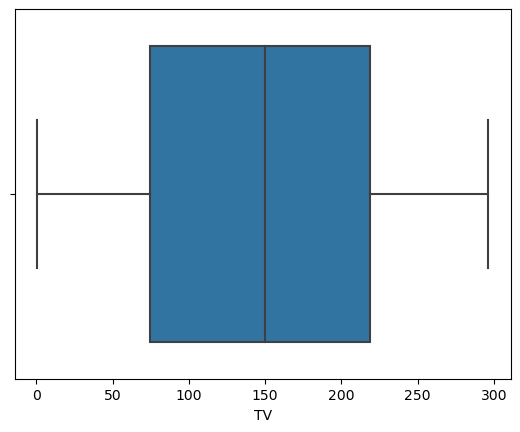

In [91]:
# Check for outliers in TV
sns.boxplot(x=data.TV)

<AxesSubplot:xlabel='Radio'>

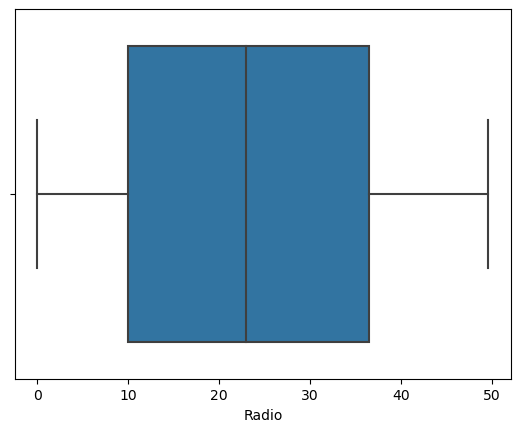

In [92]:
# Check outliers in Radio
sns.boxplot(x=data.Radio)

<AxesSubplot:xlabel='Newspaper'>

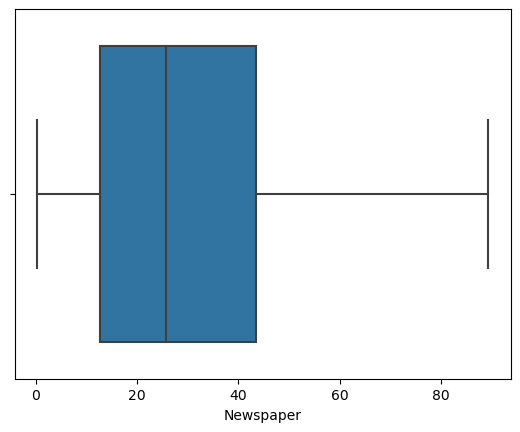

In [93]:
# check outliers in Newspaper
sns.boxplot(x=data.Newspaper)

<AxesSubplot:xlabel='Sales'>

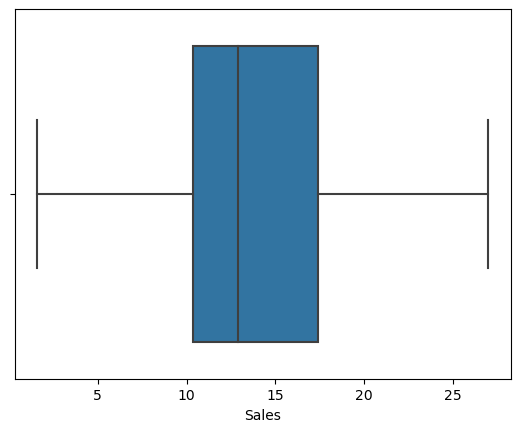

In [48]:
# check outliers in Sales
sns.boxplot(x=data.Sales)

In [49]:
# We can see that there are few outliers in Newspaper column
# outliers in Newspaper are seen toward right side

In [50]:
# How to find those outliers
# IQR- Use this method when data is not normal
# 3-sigma rule - use this method when data is normal

In [51]:
# IQR
# find Q1 and Q3
# fid IQR=Q3-Q1
# find lower limit and upper limit
# lower_limit=Q1-1.5*IQR
# upper_limit=Q3+1.5*IQR
# Find records/values which are greater than upper limit and less than lower limit


In [52]:
# find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Newspaper'].quantile(0.75)
print("upper quartile",Q3)

lower quartile 12.75
upper quartile 45.1


In [53]:
# find IQR
IQR=Q3-Q1
IQR

32.35

In [54]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower limit is -35.775000000000006
upper_limit is 93.625


In [55]:
# find values above upper_limit
data.loc[data['Newspaper']>upper_limit]

TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8

In [56]:
len(data.loc[data['Newspaper']>upper_limit])/len(data)

0.01

In [57]:
# find values below lower limit
data.loc[data['Newspaper']<lower_limit]

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []

In [58]:
# How to handle outliers
# since data is not normal will replace outliers with median
data.loc[data['Newspaper']>upper_limit,"Newspaper"]=data["Newspaper"].median()

<AxesSubplot:xlabel='Newspaper'>

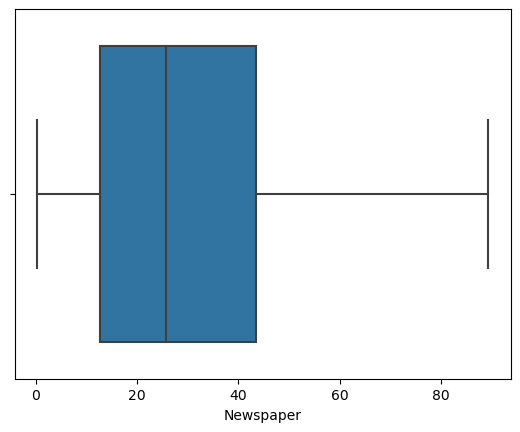

In [59]:
# check are there any outliers in Newspaper
sns.boxplot(x=data.Newspaper)

In [60]:
# Skipping scaling

In [61]:
# Skipping converting categorical data into numerical data

# Feature Engineering

In [62]:
# drop irrelevant columns
# Selecting best features
# Drop the columns which has very less correlation with target variables.
# Drop one of the column if two input variables has high correlation

In [63]:
data.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.048462  0.782224
Radio      0.054809  1.000000   0.343141  0.576223
Newspaper  0.048462  0.343141   1.000000  0.215938
Sales      0.782224  0.576223   0.215938  1.000000

<AxesSubplot:>

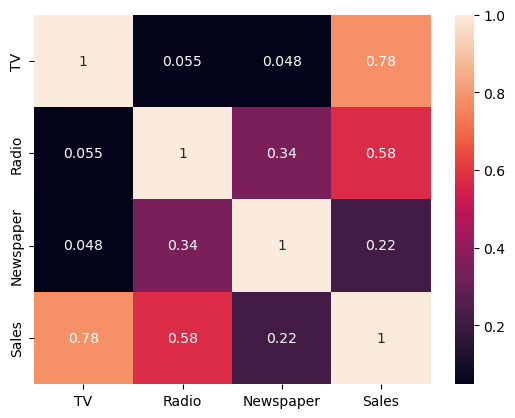

In [64]:
sns.heatmap(data.corr(),annot=True)
# annot=True is used for labelling the corr values
# In this Newspaper has very less correlation with sales, since dataset is small we are not dropping Newspaper.

<AxesSubplot:>

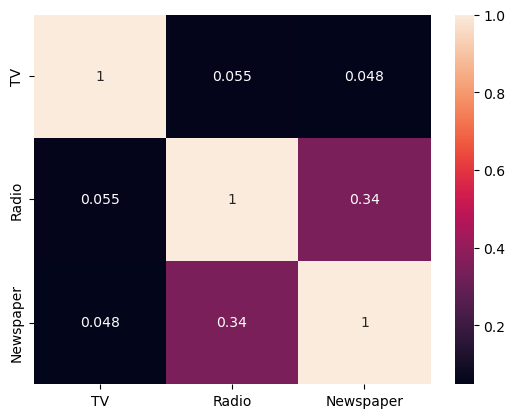

In [65]:
# check for multicollinearity- there shoud not be any high correlation among input variables
sns.heatmap(data.drop("Sales",axis=1).corr(),annot=True)

In [66]:
# Heta map analysis
# Linearity
# We include columns which has high correlation with target.
# We drop columns which has less correlation with target
# Little or no multicollinearity
# We include columns which has less correlation among each other
# We drop one of the column if two input variable have high correlation.

### Split data into x and y

In [67]:
x=data.drop("Sales",axis=1)
y=data['Sales']

# Sklearn
It is one of the scientific library which includes all the packages related to Machine learning, data cleaning and feature engineering

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [69]:
x_train.shape

(140, 3)

In [70]:
x_test.shape

(60, 3)

# Model Building

In [71]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y-train
model.fit(x_train,y_train)

LinearRegression()

In [72]:
# make predictions /test model
y_pred=model.predict(x_test)
y_pred

array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [73]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: Sales, dtype: float64

In [74]:
# slopes/coefficients of x
model.coef_

array([0.04539939, 0.17757031, 0.00502354])

In [75]:
# intercept
model.intercept_

3.0901720352909123

In [94]:
# How to make predictions
model.predict([[100,50,10]]) # TV-100, Radio-50, Newspaper-10

array([16.55886148])

In [95]:
# Total sales is 16.5M

In [96]:
model.predict([[1000,300,50]]) # TV-1000, Radio-300, Newspaper-50

array([102.01182817])

In [97]:
#Total sales is 102M

In [98]:
# The more we spend on TV for marketing the sales generated are high

# Evaluate the model

In [78]:
# Loss functions to know the difference between actual and predicted values.
# Different Error/Loss functions in Regression algorithm are
# MSE(Mean Squared error)
# MAE(Mean absolute error)
# RMSE(Root mean squared error)

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [81]:
# MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

2.2044386306690162

In [82]:
# MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.1992980850475552

In [83]:
# RMSE
rmse=np.sqrt(MSE)
rmse

1.4847352055733765

In [84]:
# r2_score
r2_score(y_test,y_pred)

0.9134809669573123

In [85]:
# 91% better model to make predictions.
# Model has learnt 91% of the information

In [86]:
# adjusted R2 score

In [87]:
adj_r2=1-(1-0.91348096695731231)*(60-1)/(60-3-1)
adj_r2

0.9088460187585968